# <center>Блок 4. Введение в машинное обучение<center>
## <center>ML-2. Обучение с учителем: регрессия<center>
### <center>2.Линейная регрессия: аналитическое решение<center>
#### <center>Аналитическое решение с помощью Numpy<center>

In [2]:
import numpy as np # для матричных вычислений
import pandas as pd # для анализа и предобработки данных
import matplotlib.pyplot as plt # для визуализации
import seaborn as sns # для визуализации
from sklearn import linear_model # линейные модели
from sklearn import metrics # метрики
%matplotlib inline
plt.style.use('seaborn-v0_8')

In [6]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_data = pd.read_csv('C:\\IDE\data\\Block_4\\asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Text(0, 0.5, 'Correlations coefficient')

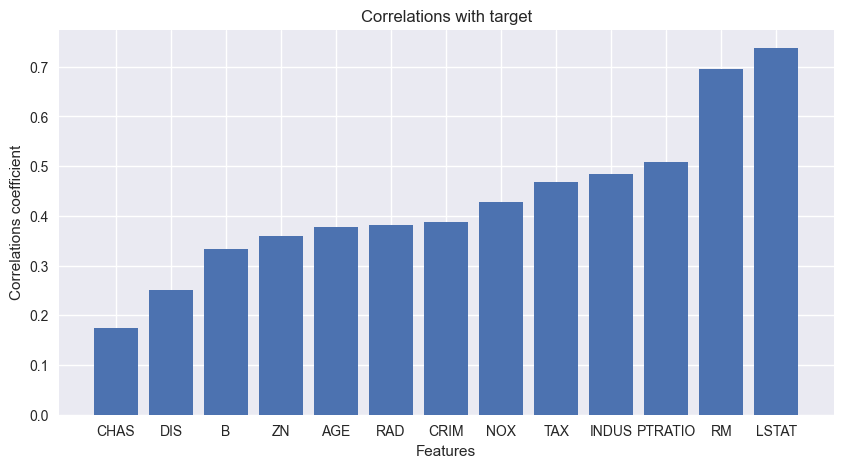

In [8]:
# вычисляем модуль корреляции
corr_with_target = boston_data.corr()['MEDV'].abs().sort_values()
# удаляем корреляцию целевой переменной с самой собой
corr_with_target = corr_with_target.drop('MEDV')
# строим столбчатую диаграмму корреляций
fig, ax = plt.subplots(figsize=(10, 5)) # фигура + координатная плоскость
ax.bar(corr_with_target.index, corr_with_target.values) # столбчатая диаграмма
ax.set_title('Correlations with target') # название графика
ax.set_xlabel('Features') # название очи x
ax.set_ylabel('Correlations coefficient') # название оси y

In [11]:
X = boston_data[['LSTAT']] # матрица наблюдений
y = boston_data['MEDV'] # вектор правильных ответов
X.head()
#y.head()

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33


In [12]:
def linear_regression(X, y):
    # создаем вектор из единиц
    ones = np.ones(X.shape[0])
    # добавляем вектор к таблице первым столбцом
    X = np.column_stack([ones, X])
    # вычисляем обратную матрицу Q
    Q = np.linalg.inv(X.T @ X)
    # вычисляем вектор коэффициентов
    w = Q @ X.T @ y
    return w

In [13]:
# вычисляем параметры линейной регрессии
w = linear_regression(X, y)
# выводим вычисленные значения параметров в виде вектора
print('Vector w: {}'.format(w))
# выводим параметры с точностью до двух знаков после запятой
print('w0: {:.2f}'.format(w[0]))
print('w1: {:.2f}'.format(w[1]))

Vector w: [34.55384088 -0.95004935]
w0: 34.55
w1: -0.95


In [14]:
# задаем процент низкостатусного населения
x_example = 5.18
# делаем предсказание
y_predict = w[0] + w[1]*x_example
print('Predicted value: {:.2f}'.format(float(y_predict)))

Predicted value: 29.63


In [15]:
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    fig, ax = plt.subplots(figsize=(8, 4)) # фигура + координатная плоскость
    ax.scatter(X, y_true, alpha=0.7, label='Sample data') # диаграмма рассеяния
    ax.plot(X, y_predict, color='black', label='Regression model') # линейный график
    ax.set_xlabel(xlabel) # название оси абсцисс
    ax.set_ylabel(ylabel) # название оси ординат
    ax.legend(facecolor='white', fontsize=11) # легенда